In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

### Plot the input data

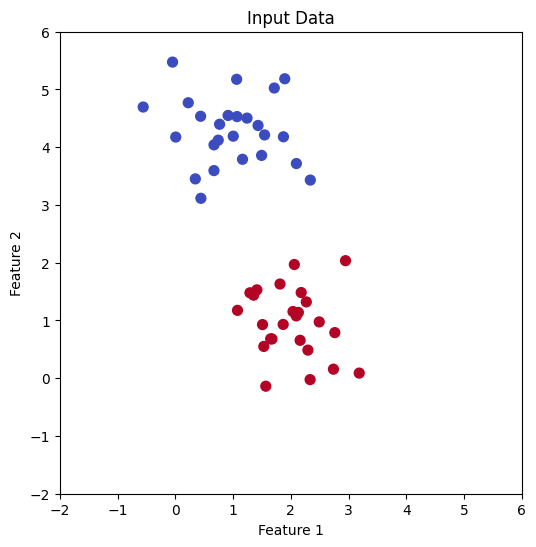

In [3]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='coolwarm', s=50, linewidth=1)
ax.scatter(X[:, 0], X[:, 1], c=y,**point_style)
ax.set(aspect="equal",
       xlim=(-2, 6), ylim=(-2, 6),
       xlabel="Feature 1", ylabel="Feature 2"
      ,title="Input Data");

Note other color options:
    
    ```'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
       'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic'```

In [4]:
# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

### Model Learned from Input Data

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(X, y)

LogisticRegression()

In [6]:
# predict the labels
y_pred = clf.predict(X2)

In [7]:
import numpy as np
xx, yy = np.mgrid[-2:7:.01, -2:7:.01]
grid = np.c_[xx.ravel(), yy.ravel()] # ravel() creates a flattened array
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

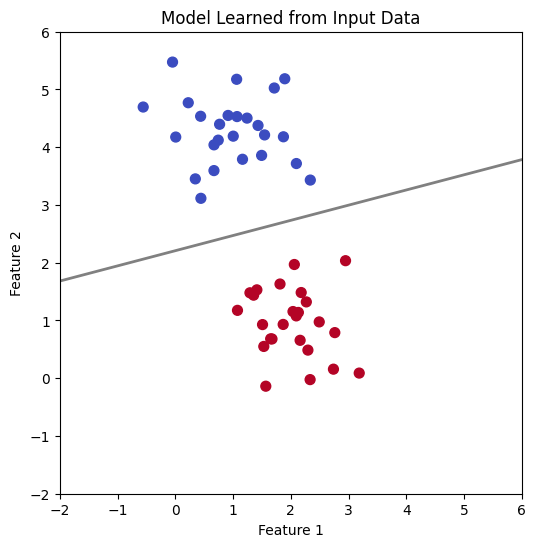

In [8]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], colors='gray',linewidths=2)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style) # y = true labels
ax.set(aspect="equal",
       xlim=(-2, 6), ylim=(-2, 6),
       xlabel="Feature 1", ylabel="Feature 2"
      ,title="Model Learned from Input Data");

### New data and predictions

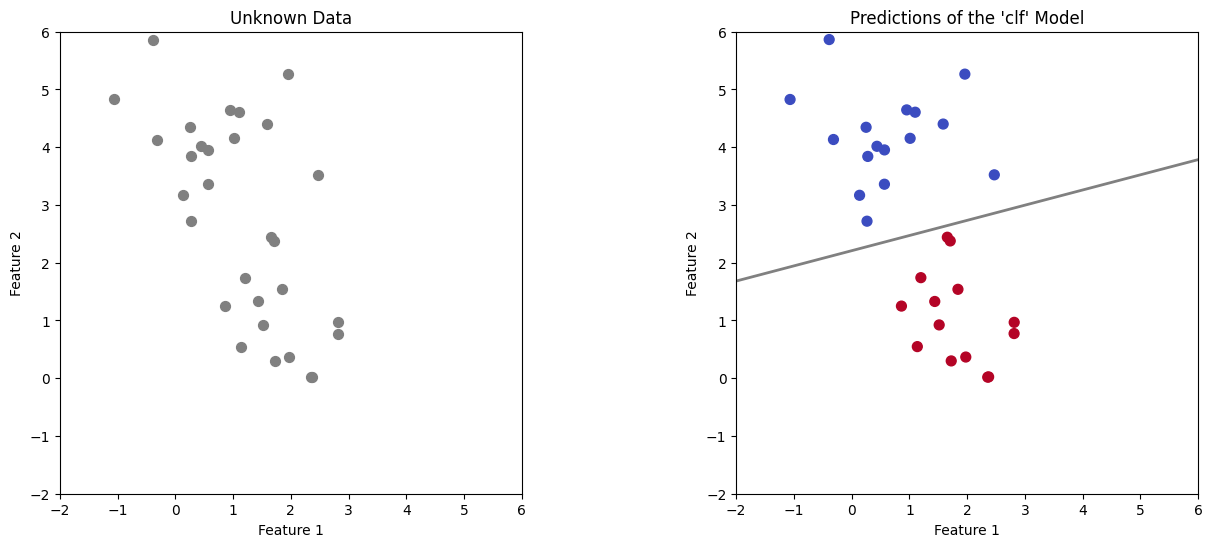

In [11]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
#fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)

ax[1].scatter(X2[:, 0], X2[:, 1], c=y_pred, **point_style)
ax[1].contour(xx, yy, probs, levels=[.5], colors='gray',linewidths=2)


ax[0].set(aspect="equal",
       xlim=(-2, 6), ylim=(-2, 6),
       xlabel="Feature 1", ylabel="Feature 2"
      ,title="Unknown Data")
ax[1].set(aspect="equal",
       xlim=(-2, 6), ylim=(-2, 6),
       xlabel="Feature 1", ylabel="Feature 2"
      ,title="Predictions of the 'clf' Model");

### Not a good line

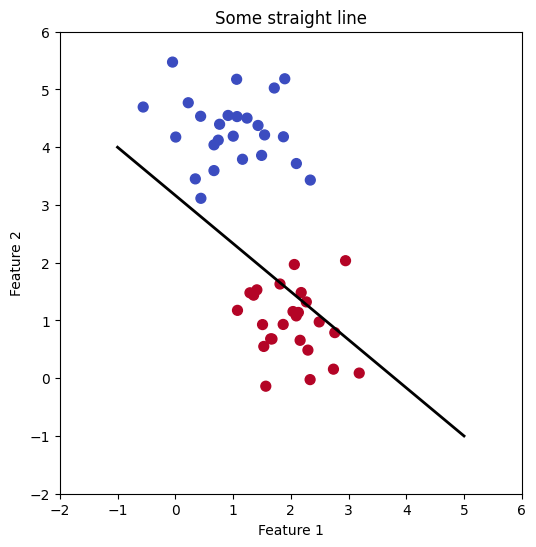

In [12]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='coolwarm', s=50, linewidth=1)
ax.scatter(X[:, 0], X[:, 1], c=y,**point_style)
plt.plot([-1, 5], [4, -1], 'k-', lw=2)
ax.set(aspect="equal",
       xlim=(-2, 6), ylim=(-2, 6),
       xlabel="Feature 1", ylabel="Feature 2"
      ,title="Some straight line");

**end of examples**